<div style="display: flex; align-items: center; gap: 2px;">
  
  <div style="text-align: left; padding: 0;">
   <h2 style="font-size: 1.8em; margin-bottom: 0;"><b>Working with many predictors and more...</b></h2>
   <br>
   <h3 style=" font-size: 1.2em;margin-bottom: 0;">An analyst's take on Linear Regression</h3>
   <h3 style="font-size: 1.2em; margin-bottom: 0; color: blue;"><i>Dr. Satadisha Saha Bhowmick</i></h3>
  </div>

  <div style="margin-right: 5px; padding: 0;">
    <img src="images/intro-pic.png" align="right" alt="intro-pic" style="width: 70%;">
    <!-- TEXT NEXT TO IMAGE -->
      <div style="font-size: 0.5em;">
        <p>Woman teaching geometry, from a fourteenth-century edition of Euclid’s geometry book.</p>
      </div>
  </div>

</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from ipywidgets import interact
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

bac_data = pd.read_csv("BLOODALC.csv")

### Week 2: Learning Outcomes
Moving beyond Simple Linear Regression

<div style="display: flex; gap: 2px;">

  <div style="flex: 1;">
  <ul>
    <li class="fragment">Fitting linear models with multiple predictors.</li>
    <li class="fragment">Model Fit Statistics for evaluation</li>
    <li class="fragment">Using Fit Statistics for inference vs prediction</li>
    <li class="fragment">Linear Regression Assumptions and Diagnostics</li>
  </ul>

  
  </div>

  <div style="flex: 1;">
  <ul>
    <li class="fragment">Identify significant variables in a linear regression model.</li>
    <li class="fragment">Confidence and Prediction Intervals for Regression</li>
    <li class="fragment">Impact of Influential Observations</li>
  </ul>
  </div>

</div>

### Multiple Linear Regression

- The world is too complex for every experiment or phenomenon to be explained by a single predictor.
- A general linear model with multiple predictors is more common in practice.
- General form of the equation is same as before : $ y = X\beta + \epsilon $
- Normal equations still hold to provide the least-squares solution $\hat{\beta}$ : $X^TX\hat{\beta} = X^Ty$
- Instead of a least squares line, we have a hyperplane!



### Multiple Linear Regression

Given a collection of $p$ potential predictors, multiple linear regression fits the following model:
$$\begin{aligned}
&& E(Y|X)= \beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2}+ ... +\beta_{p}X_{p}\\
&& Var(Y|X)= \sigma^2
\end{aligned}$$

All the $\beta$ s and $\sigma^2$ are unknown parameters to be estimated.
- $\color{blue}{\text{Ordinary Least Squares}}$(OLS) Estimator: $ \hat{\beta} = (X^TX)^{-1}X^Ty $
- For the least squares solution to exist, $X^TX$ must be invertible.
- We still do not compute the $\beta$ s from least squares estimates directly. 
    - Uncorrected sums of squares and cross products are prone to large rounding errors! 

### Multiple Linear Regression

For any observable pair of $(x,y)$ we have:
$$\begin{aligned}
&& \hat{y} = E(Y|X=x)= \beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+ ... +\beta_{p}x_{p}\\
&& \hat{e} = y - \hat{y}
\end{aligned}$$

$e$ is the residual or error term.

Linear regression places the following <u><b>assumptions on the error</b></u>.
$$\begin{aligned}
&& E(e|X) = 0; Var (e|X) = \mathcal{\sigma^2 I_n}\\
&& \textbf{Normality: } P(e|X) \sim \mathcal{N(0, \sigma^2 I_n)}
\end{aligned}$$

More on model assumptions later!

### Linear Regression: Beers and BAC

<div class="fragment" style="
    border: 4px solid #3b82f6;
    background: #eef6ff;
    padding: 10px 15px;
    border-radius: 6px;
    margin: 10px auto;
    width: 90%;
    box-sizing: border-box;
    font-size: 1.2em;
    line-height: 1.35;
    color: #1e40af;">
  
  Researchers at Ohio State University had sixteen volunteers drink a randomly drawn number of 12 ounce beer cans. Thirty minutes after drinking their last beer, each subject had their blood alcohol content (BAC) measured. Subjects had their gender and weight recorded and were also administered a road sobriety test before and after the alcohol consumption. We want to predict <b>BAC</b> from the remaining information available for each subject.

</div>

In [2]:
bac_data

,ID_OSU,Gender_OSU,Weight_OSU,Beers,BAC,Sobr1,Sobr2
0,1,female,132,5,0.100,10.00,6.00
1,2,female,128,2,0.030,9.50,9.25
2,3,female,110,9,0.190,9.75,4.75
3,4,male,192,8,0.120,10.00,7.50
4,5,male,172,3,0.040,10.00,9.75
5,6,female,250,7,0.095,9.50,6.50
6,7,female,125,3,0.070,9.50,7.00
7,8,male,175,5,0.060,9.75,8.75
8,9,female,175,3,0.020,9.50,6.00
9,10,male,275,5,0.050,9.75,8.50


#### Aside on Categorical Variables

Our data has a categorical variable `Gender_OSU` whose values are converted to dummy variables.

In [3]:
reg_vars = ["Gender_OSU", "Weight_OSU", "Beers", "Sobr1", "Sobr2", "BAC"]
bac_data = pd.get_dummies(bac_data[reg_vars], drop_first = True)
bac_data.head()

,Weight_OSU,Beers,Sobr1,Sobr2,BAC,Gender_OSU_male
0,132,5,10.00,6.00,0.10,False
1,128,2,9.50,9.25,0.03,False
2,110,9,9.75,4.75,0.19,False
3,192,8,10.00,7.50,0.12,True
4,172,3,10.00,9.75,0.04,True


In [4]:
# Define the model using R-style formula
# The format is 'dependent_variable ~ independent_variable1 + independent_variable2 + ...'
mlr_formula = 'BAC ~ Beers + Weight_OSU + Gender_OSU_male + Sobr1 + Sobr2'

# Fit the model using OLS (Ordinary Least Squares)
model = smf.ols(formula=mlr_formula, data=bac_data).fit()

# Print the summary of the regression results
model.params

Intercept                  0.092460
Gender_OSU_male[T.True]    0.001261
Beers                      0.019131
Weight_OSU                -0.000349
Sobr1                     -0.003447
Sobr2                     -0.002320
dtype: float64

### Linear Regression Model: Beers and BAC

Our linear regression model can be symbolically expressed as:
$$ BAC = 0.092460 + 0.001261 \times Gender\_OSU\_male + 0.019131 \times Beers -0.000349 \times Weight\_OSU -0.003447 \times Sobr1 -0.002320 \times Sobr2 $$

<span class="fragment">
<h4 style="color: blue; font-weight: bold; font-style: italic;">Your Turn</h4>

What interpretations can you make of the impact of the model variables on BAC looking at the model coefficients?
</span>

### Sum of Squares

When discussing linear regression, it is common to have three types of sum of squares.
- $\color{blue}{\textbf{SST}}$: Total variability of data. 
$\lVert \vec{y}-\bar{y} \rVert^2$
- $\color{blue}{\textbf{SSR}}$: Sum of squares of Regression. This is the portion of the total variability explained by regression.
$\lVert \bar{y}-X\vec{\beta} \rVert^2 = \lVert \bar{y}-\hat{y} \rVert^2$
- $\color{blue}{\textbf{SSE}}$: Sum of squared errors or residuals. This is the portion of the total variability that remains unexplained.
$\lVert \vec{y}-X\vec{\beta} \rVert^2 = \lVert \vec{e} \rVert^2$
<br>

The total variability of data is the sum of the variability explained by regression and the unexplained variability that manifests as error.
- $SST = SSR+SSE$
- Given a constant total variability, a lower error will indicate better regression and a higher error will indicate less powerful regression.

<div style="
border-left: 6px solid #2563eb;
background: #eef6ff;
padding: 12px 16px;
margin: 10px 0;
border-radius: 6px;
">

<strong>Remark.</strong>  
Please beware of notational differences between SSE vs RSS or SSR vs ESS depending on the text you are following.<br> We will be consistent with the notations listed above!
</div>

### Sum of Squares

In order to center our observations around 0, we might want to subtract them from the mean $\bar{y}$, such that:
- $SST= \lVert \vec{y} \rVert^2$
- $SSR= \lVert \hat{y} \rVert^2$
- $SSE= \lVert \vec{y}-X\vec{\beta} \rVert^2$

<div class="fragment" style="
    border: 4px solid #3b82f6;
    background: #eef6ff;
    padding: 10px 15px;
    border-radius: 6px;
    margin: 10px auto;
    width: 90%;
    box-sizing: border-box;
    font-size: 1.2em;
    line-height: 1.35;
    color: #1e40af;">

<b>Show that:</b><br><br>
a. $SST = SSR + SSE$ <br>
b. $SSR = \vec{\beta}^TX^T\vec{y}$ and $SSE = \vec{y}^T\vec{y} - \vec{\beta}^TX^T\vec{y}$

</div>

### A geometric approach

Recall from our lessons on the way to deriving the normal equations that our least square solution $\hat{y}=X\vec{\beta}$ is an orthogonal projection of $\vec{y}$ onto the column space of the design matrix $X$. And by definition, $\vec{y}-X\vec{\beta}$ is its orthogonal component.

By virtue of the <b>Pythagorean Theorem</b> we have, $ \lVert \vec{y} \rVert^2 = \lVert \hat{y} \rVert^2 + \lVert \vec{y}-X\vec{\beta} \rVert^2$.\
Or, $SST = SSR + SSE$


### An algebraic approach

$$\begin{aligned}
\color{red}{SSR + SSE} &= \lVert \hat{y} \rVert^2 + \lVert \vec{y}-X\vec{\beta} \rVert^2 = \lVert X\vec{\beta} \rVert^2 + \lVert \vec{y}-X\vec{\beta} \rVert^2 \\
&= X\vec{\beta} \cdot X\vec{\beta} + (\vec{y}-X\vec{\beta}) \cdot (\vec{y}-X\vec{\beta}) \\
&= X\vec{\beta} \cdot X\vec{\beta} + \vec{y} \cdot \vec{y} - \vec{y} \cdot X\vec{\beta} - X\vec{\beta} \cdot \vec{y} + X\vec{\beta} \cdot X\vec{\beta} \\
&= \lVert \vec{y} \rVert^2 + 2X\vec{\beta} \cdot X\vec{\beta} - 2 \vec{y} \cdot X\vec{\beta} ; (\textit{commutative property of dot product}) \\
&= \lVert \vec{y} \rVert^2 - 2 X\vec{\beta} \cdot [\vec{y} - X\vec{\beta}] \\
&= \lVert \vec{y} \rVert^2 - 2 \cdot 0; ([\vec{y} - X\vec{\beta}] \perp X\vec{\beta})\\
&= \lVert \vec{y} \rVert^2 = \color{red}{SST}
\end{aligned}$$


### Model Fit Statistics

How well does our estimated regression equation fit the data?

- We will study metrics that help us evaluate the fit of a regression models.
- We will learn about metrics that help us draw statistical inferences around our model's fit.
- We will test existing packages that help us draw both predictions and inferences from our fitted model.
    - For predictive purposes `sklearn` is the standard Python package to use.
    - We can use the `statsmodels` package to organize all relevant information for statistical inference in an ANOVA table.

### Model Fit Statistics: $r^2$

You may have already seen this before (DATA 119)!

$\color{blue}{\text{Coefficient of Determination}}$: measures what proportion of the total variability of the response variable is explained by the model.
- $ r^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$
- always falls between 0 and 1, with values closer to 1 representing better model fit.

In [5]:
model.summary().tables[0]

Dep. Variable:,BAC,R-squared:,0.955
Model:,OLS,Adj. R-squared:,0.932
Method:,Least Squares,F-statistic:,42.39
Date:,"Tue, 20 Jan 2026",Prob (F-statistic):,2.06e-06
Time:,00:37:50,Log-Likelihood:,52.538
No. Observations:,16,AIC:,-93.08
Df Residuals:,10,BIC:,-88.44
Df Model:,5,,
Covariance Type:,nonrobust,,


### An aside on Degrees of Freedom

You may have seen this concept come up often in statistics and data science. 
Generally speaking, degrees of freedom represents the number of independent values that are free to vary during the calculation of a statistic.

$\color{blue}{\textbf{Degrees of Freedom for Sample Variance}}$. For a dataset with n observations $Y = {y_1, y_2,..., y_n}$, sample variance calculation uses the sample mean, $\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_{i}$. Variance also requires calculating the squared terms $(y_{i}-\bar{y})^2; \forall i$. However, knowing the first $n-1$ $y$-terms implies that we can infer the last term $y_n = n\bar{y} - \sum_{i=1}^{n-1}y_{i}$, thereby no longer making it a free (to vary) variable. Hence the calculation of sample variance has a degree of freedom of $n-1$. You may have already seen this in the formula for sample variance $\frac{1}{n-1}\sum_{i=1}^{n}(y_{i}-\bar{y})^2$, where the sum of squares is divided by the degrees of freedom instead of the number of samples!

<div style="
border-left: 6px solid #2563eb;
background: #eef6ff;
padding: 12px 16px;
margin: 10px 0;
border-radius: 6px;
font-size: 0.8em;
">
<b>Remark.</b>  
Dividing the sum of squares by $n-1$, instead of the sample size $n$, to calculate the sample variance is called <b>Bessel's correction</b>.<br> This is a necessary statistical adjustment that avoids potential underestimation and ensures that the sample variance provides an unbiased estimate of the population variance.<br> This is especially crucial for small samples where the correction makes a significant difference. 
</div>

### Degrees of Freedom in Regression

In linear regression we are dealing with two types of degrees of freedom.

1. $\color{blue}{\textbf{Total Degrees of Freedom}}$: You can think of it as the degrees of freedom for SST. Follows from the previous discussion that this is given by $n-1$, with $n$ being the number of observations.
2. $\color{blue}{\textbf{Residual Degrees of Freedom}}$: You can think of it as the degrees of freedom for SSE, i.e. the sum of squared residuals. For a regression model with $p$ coefficients (hyperplane of $p$ independent vectors), the residual degrees of freedom is given by $n-p-1$.

Remember, $p$ is the $\color{blue}{\textbf{number of predictors}}$ used in your regression model.

### Model Fit Statistics: Adjusted $r^2$

A fairly big disadvantage of $r^2$ is the fact that it is non-decreasing. Given that $r^2$ is a measure of fit where model coefficients are calculated using OLS (by minimizing the SSE), its mathematical form ensures that adding more variables will still result in the best possible fit with those variables. 

Mathematically, adding more variables cannot increase the sum of squared residuals because the new model has more degrees of freedom to minimize these residuals. Even by adding unrelated variables, SSE can stay the same (when the corresponding coefficients are set to 0). Or worse, even decrease variation of the response variable by capturing correlations with new predictors that exist purely due to random chance.\
Reminder, SSE is inversely related to $r^2$.

Since $r^2$ does not guarantee adding more variables will always lead to models with more explanatory power, we need an alternative!

Adjusted $r^2$ factors in a model's degrees of freedom (higher for those with more variables). It is bounded between 0 and 1, with values closer to 1 being more desirable.
$$
r^2_{adj} = 1- \frac{SSE}{SST}\frac{n-1}{n-p-1}
$$

In [6]:
model.summary().tables[0]

Dep. Variable:,BAC,R-squared:,0.955
Model:,OLS,Adj. R-squared:,0.932
Method:,Least Squares,F-statistic:,42.39
Date:,"Tue, 20 Jan 2026",Prob (F-statistic):,2.06e-06
Time:,00:37:50,Log-Likelihood:,52.538
No. Observations:,16,AIC:,-93.08
Df Residuals:,10,BIC:,-88.44
Df Model:,5,,
Covariance Type:,nonrobust,,


### Model Fit Statistics: RMSE

Root Mean Squared Error (RMSE) is an alternative simple metric to compare regression models. It is the square root of the average squared error (residual) of predictions made by a model.
$$
RMSE = \sqrt{\frac{SSE}{n}} = \sqrt{\frac{\sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2}{n}}
$$

There is no scale for RMSE! You have to compare it to the RMSE for another model fit from the same data. Smaller values are more desirable.

In [7]:
#Calculating predicted values and RMSE
fitted2 = model.predict()
np.sqrt(metrics.mean_squared_error(bac_data["BAC"], fitted2))

0.009071924032251964

### Model Fit Statistics: RSE

This metric can go by a few different names:
- Residual Standard Error (RSE)
- Standard Error of the Regression
- Standard Error of Fit

It is an <u><b>unbiased estimate</b></u> of the $\color{blue}{\textbf{standard deviation of the error term}}$ in a regression model. I.e., it is the square root of the variance of estimated residuals.<br> 
As explained before, when working with sample data, the calculation is adjusted for the number of degrees of freedom.

$$
se = \sqrt{\frac{SSE}{n-p-1}} = \sqrt{\frac{\sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2}{n-p-1}}
$$

It is the average distance between an observation from a sample of data and the regression hyperplane (line in 2D) in units of the response variable.
- Think of it as a measure showing how tightly the observations surround the regression hyperplane.
- Can be used to make prediction intervals, more on this later!

#### RSE in practice

Like RMSE, there is no scale for RSE! You have to compare it to the RSE for another model fit from the same data. Smaller values are more desirable.

While the RSE is not directly available in the summary table of `statsmodel` it is defined within the package as root mean squared error of the residuals. 
- <i>Please beware that this is <u><b>not</b></u> the RMSE which is a regular average of mean squared error and not corrected with division by the appropriate degrees of freedom.</i> This can be confusing!

In [8]:
rse = np.sqrt(model.mse_resid)
print(rse)

0.01147517708077401


### Model Fit Statistics: AIC

Instead of distances, if we had a likelihood function. Unlike $r^2$ and adjusted $r^2$, the Akaike Information Criterion is related to the likelihood of the data.
$$
AIC = 2p - 2 ln(\hat{L})
$$

- The $2p$ penalty discourages overfitting relative to maximizing "goodness of fit" as measured by $\hat{L}$, the likelihood function of the data. Technically, we minimize the negative log likelihood.

- This formula is derived from estimated Kullback-Leibler divergence – think of it as measuring information lost from a perfect model.

- There is no “scale” for AIC! You have to compare it to the AIC for another model fit from the same data. Smaller values are more desirable.

In [9]:
model.aic

-93.07623592630601

### Model Fit Statistics: BIC

Bayesian Information Criterion (BIC) is similar to AIC but takes a stricter approach to model complexity.
$$
AIC = 2p ln(n) - 2 ln(\hat{L})
$$

- The penalty term grows with the number of observations in the dataset. BIC always prefers the simplest possible models and becomes more cautious about adding new parameters as the dataset size grows.

- There is no “scale” for BIC! You have to compare it to the BIC for another model fit from the same data. Smaller values are more desirable.

In [10]:
model.bic

-88.44070359286732

### Overfitting and Model Selection

- Most of these model fit statistics are calculated using "in sample" data. 
- Because of overfitting, we are often more concerned with how the model might perform on unseen test data. To simulate that, we could estimate test error on a new dataset, or a portion of the original dataset.
    - Pros: do not have to have two datasets.
    - Cons: You’re not necessarily using all of the data that was collected to fit your models–and in general, more data is helpful.

<b>Cross validation is an important tool to combat overfitting when working with limited data. It can help address the challenges that arise in training with splitting your data.</b>

### Cross Validation

- Cross validation (CV) is often used in multiple contexts.
    - As a method of model selection/evaluating model fit
    - Also as a method of choosing hyperparameters for regularization (later).

- The basic idea is to split the whole data into small portions. Fit the model with data from all but one portion and evaluate it by evaluating the goodness of fit on the unused portion. We then put this portion of data back in, and repeat the whole split-fit-predict process. Note that any of the aforementioned model fit statistic can be used to evaluate the fit of a model.

- Depending on the type of data partitioning we have,
    - Leave-One-Out Cross Validation
    - $K$-fold Cross Validation

- There is no scale for CV (of any kind). You have to compare it to the cross-validation error for another model fit from the same data. Smaller values of cross-validation error imply the predictions were close to the actual values, which is more desirable.

#### Cross Validation in Practice

We can use the popular `scikit-learn` library's built in model selection modules to implement cross validation. More on this [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [11]:
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.linear_model import LinearRegression

X1 = bac_data[["Beers", "Weight_OSU"]]
y = bac_data[["BAC"]]

#fitting a Linear Regression model with default 5 fold cross-validation
print(cross_val_score(LinearRegression(fit_intercept = True), X1, y))
print(cross_val_score(LinearRegression(fit_intercept = True), X1, y).mean())

[0.9382031  0.73119086 0.11008873 0.74181497 0.94173008]
0.692605548701853


### Variable Significance

Regression Analysis can help us understand the statistical significance of variables in an experiment as potential predictors of the response.

A typical framing: <i>Is the number of beers a student drinks a statistically significant predictor of the student’s blood alcohol content, all other factors held equal?</i>
- To answer this we estimate the statistical significance of the regression model's coefficient associated with this variable.
- We conduct a hypothesis test at a certain pre-determined significance level ($\alpha = 5\%$).
    - Is the predictor's model coefficient (statistically) significantly different from 0?
    - Null Hypothesis is assumption of no significance $H_0: \beta_{Beers} = 0$.
    - Alternative Hypothesis $H_A: \beta_{Beers} \neq 0$.

### Variable Significance

We can use the $\color{blue}{\textbf{Standard Error of Model Coefficients}}$ and known sampling distributions to develop inference around our model predictors.
- Remember that the regression model is fitted around a sample. So much like sample mean, the model coefficients (parameters) are also estimates that are subject to an underlying sampling distribution(how they'd vary across samples).

For a linear model, the OLS estimator is $\hat{\beta} = (X^TX)^{-1}X^Ty$.\
By substituting $y = X\beta + \epsilon$ we get, $\hat{\beta} = \beta + (X^TX)^{-1}X^T\epsilon$


### Variable Significance

Turns out that upon deriving the OLS estimator:
- Estimates of individual model coefficients are normally distributed
    - $\hat{\beta}_j|X \sim \mathcal{N}(\beta_j, \sigma^2(X^TX)^{-1}_{jj})$
- Standardized coefficients individually follow a Student's T Distribution. Also called the observed $t$-statistics of the model coefficients.
    - $ \frac{\hat{\beta}_j-\beta_j}{se(\hat{\beta}_j)} \sim \mathcal{t}_{n-p-1}$; $\beta_j$ reflects your prior belief in the predictor's coefficient. <u style="color: blue; font-size: 1.0em; font-weight: bold; font-style: italic;">Typically set to 0</u>.
    - The standard error of model coefficient $\hat{\beta}_j$ is $se(\hat{\beta}_j) = \sqrt{se^2 (X^TX)^{-1}_{jj}}$, where $se$ is the standard error of regression.
    - For simple linear regression, the standard error of the slope is given by $se(\hat{\beta}_1) = \sqrt{ \frac{se^2}{\sum_{i=1}^n(x_i-\bar{x})^2}}$

### Variable Significance with Hypothesis Testing

It’s good practice to follow these steps for any hypothesis test:

- Identify sample statistics, in this case model coefficient of the predictor of interest, and determine what significance level you wish to use.
- Check if model (linear regression) conditions hold. More on that later!
- Compute the standard error of model coefficient and corresponding $t$-statistic. [Calculate the two-tailed $p$-value](https://www.graphpad.com/quickcalcs/pvalue1/) for this $\lvert t \rvert $-statistic.
    - Alternatively, we can also refer to the $t$-critical value of a two-tailed $t$ test at the desired significance level.
    - We must factor in the correct number of degrees of freedom!

We will use the `statsmodels` output directly to find this information.

#### Variable Significance in Practice

- The $\lvert t \rvert $-statistic statistic for $\beta_{Beers}$ is 9.037(very high), and the corresponding $p$ value is rounded to 0.000
- This $p$ value is lower than any reasonable significance level including $\alpha=0.05$. Hence we <u>reject</u> the null hypothesis.
- We conclude that there is statistically significant evidence that the number of beers a student drinks can help predict the student’s BAC.

<span class="fragment">
<u style="color: blue; font-size: 1.0em; font-weight: bold; font-style: italic;">Your Turn</u><br>
Can you comment on the significance of the other predictors?
</span>

In [12]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0925,0.159,0.580,0.575,-0.263,0.448
Gender_OSU_male[T.True],0.0013,0.010,0.133,0.897,-0.020,0.022
Beers,0.0191,0.002,9.037,0.000,0.014,0.024
Weight_OSU,-0.0003,7.45e-05,-4.682,0.001,-0.001,-0.000
Sobr1,-0.0034,0.016,-0.209,0.838,-0.040,0.033
Sobr2,-0.0023,0.004,-0.639,0.537,-0.010,0.006


#### Confidence Intervals for Model Coefficients

- Alternatively we can draw the 95\% confidence interval (CI) of the model coefficient in question.
    - As we know, confidence intervals are an effective way of capturing the uncertainty around a sample estimate.
    - A 95\% confidence interval means that if we repeated drawing samples from the population data and also conducted regression analysis many times, the true (population) coefficient for the predictor will be present within 95\% of the calculated intervals. 

- If the interval does not contain 0 then we can infer that the predictor, whose coefficient we have been analyzing, has statistical significance in predicting the response variable.

- The `statsmodels` summary table output also provides us with the 95\% confidence intervals of each predictor. However, we can also draw intervals upon setting the significance level as we see fit.

#### Confidence Intervals for Model Coefficients

<span class="fragment">
<u style="color: blue; font-size: 1.0em; font-weight: bold; font-style: italic;">Your Turn</u><br>
Do the CIs drawn for each predictor back up your previous inference regarding their statistical significance to predict BAC?
</span>

In [13]:
model.conf_int(alpha=0.05, cols = None)

,0,1
Intercept,-0.262734,0.447653
Gender_OSU_male[T.True],-0.019945,0.022467
Beers,0.014414,0.023847
Weight_OSU,-0.000515,-0.000183
Sobr1,-0.040135,0.033241
Sobr2,-0.010411,0.005771


### Uncertainty in Predictions

As mentioned before, regression models are fitted on a sample of data drawn from an underlying population. As such, not only the model coefficients, but also the prediction estimates are subject to uncertainty.<br>
<u style="color: blue; font-size: 1.0em; font-weight: bold;">Regression is not deterministic!</u>

Sources of uncertainty in prediction.

1. Uncertainty in predictor values: Data sampled from a population of North American adults to estimate BAC might be very different from those sampled from a population of adults in the Indian subcontinent.
    - Out-of-Distribution data or Selection Bias.
2. Uncertainty in coefficient values: This points to your inherent sampling variability even when pulling data from fixed populations. We have discussed this already.
3. Variation in the actual outcome even given perfect knowledge of predictors/coefficients.
    - For example, two individuals with the same weight and gender, drawn from the same population, drinking the same number of beers over the same time period may get two different BACs due to a variety of factors.

### Uncertainty in Predictions

In addition to reporting confidence intervals for model coefficients $\beta$, we might want to draw similar inferences around model predictions.

<u style="color: blue; font-size: 1.0em; font-weight: bold;">Reminder</u><br>
What we estimate as prediction $\hat{y}$ is the expected value of the response variable given the observation of predictors $x$.

#### Prediction with Linear Regression

For any given observation, the regression model produces the expected value of a distribution of possible responses modelled by factoring in Gaussian noise.

<div style="display:flex; justify-content:center;">
    <img src="images/lin-reg-gaussian.png" style="width:45%; margin:5px;">
    <img src="images/lin-reg-gaussian2.png" style="width:45%; margin:5px;">
</div>

### Confidence Intervals for the Mean Response

As mentioned before, we can use the regression model to estimate $E(y_h|\vec{x}_h) = \vec{x}_h\beta$. Much like before, we can calculate the standard error of the expected prediction and use this to generate a $t$-interval.

The general formula is: $\text{sample estimate} \pm (\text{t-multiplier} \times \text{standard error of expected prediction})$

Standard error of the fit: $SE[\bar{y_h}] = \sqrt{se^2(\vec{x}_h^T(X^TX)^{-1}\vec{x}_h)}$
- For Simple Linear Regression, $SE[\bar{y_h}] = se\sqrt{\frac{1}{n}+\frac{(x_h-\bar{x})^2}{\sum_{i=1}^n(x_i-\bar{x})^2}}$

Confidence Interval: $\bar{y_h} \pm t_{\frac{\alpha}{2},n-p-1}\times SE[\bar{y_h}]$

### Confidence Intervals for the Mean Response

<div style="display: flex; align-items: center; gap: 5px;">

  <div class="fragment"; style="flex: 1;">
    <p>Standard error grows for values of $\vec{x}_h$ further away from $\bar{X}$.</p>
    <p>Estimated variance of $y_h$ is at the minimum at the mean of the independent variable</p>
    <p>Predictions near $\bar{x}$ have the narrowest confidence band and the corresponding predictions are the most stable. Confidence bands flare out further away from the mean of the independent variable.</p>
  </div>

  <div class="fragment"; style="flex: 1;">
    <img src="images/LinRegCIBand.png" alt="Confidence Band" scale="0.45;" style="width: 90%;">
  </div>
</div>

### Prediction Intervals of an Individual Response

Prediction intervals are uncertainty around an individual response value $\hat{y_h}$, for a given observation $\vec{x}_h$, rather than a statistic like the mean response or a model coefficient.
- Gives us the range of likely predicted values for a given observation.

Much like before, the general formula is: $\text{Sample estimate} \pm (\text{t-multiplier} \times \text{standard error})$

Standard error of the prediction: $SE[\hat{y_h}] = \sqrt{se^2(1+\vec{x}_h^T(X^TX)^{-1}\vec{x}_h)}$
- For Simple Linear Regression, $SE[\hat{y_h}] = se\sqrt{1+\frac{1}{n}+\frac{(x_h-\bar{x})^2}{\sum_{i=1}^n(x_i-\bar{x})^2}}$

Confidence Interval: $\hat{y_h} \pm t_{\frac{\alpha}{2},n-p-1}\times SE[\hat{y_h}]$

### Prediction Intervals of an Individual Response

<div style="display: flex; align-items: center; gap: 5px;">

  <div class="fragment"; style="flex: 1;">
    <p>Prediction intervals are typically <u style="color: blue; font-size: 1.0em; font-weight: bold;">wider</u> than confidence intervals. Using a confidence interval for a single predicted value (not a statistic) will underestimate the uncertainty.</p>
    <p>Confidence Intervals aim to capture the variation in mean response due to sampling variability. Prediction Intervals also factor in the random error ($\epsilon$) that can manifest in individual response values due to the inherent variability of individual observations.</p>
  </div>

  <div class="fragment"; style="flex: 1;">
    <img src="images/LinRegPIBand.png" alt="Confidence and Prediction Intervals" scale="0.45;" style="width: 90%;">
  </div>
</div>

#### Confidence and Prediction Intervals in Practice 

- We do not have to use these formula to calculate the intervals by hand. Instead, we can reliably use statistical packages like `statsmodels`.

- `summary_table` gives a lot of information, pretty much all that could reasonably be of an analyst's interest.

In [14]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(model, alpha = 0.05)
st

Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
1.0,0.1,0.09369968407159773,0.008102117681094477,0.07564704088315906,0.11175232726003641,0.06240055834013381,0.12499880980306166,0.0063003159284022725,0.008126215485502302,0.7753075142595526,0.099590327560833
2.0,0.03,0.031885710092675226,0.006921636628078912,0.01646334260246901,0.04730807758288144,0.0020262599224550107,0.06174516026289544,-0.0018857100926752274,0.009152629973070993,-0.20602931596966031,0.004046062370333531
3.0,0.19,0.18165420507660063,0.008662533046744266,0.16235287863871953,0.20095553151448173,0.1496186225514376,0.21368978760176366,0.008345794923399374,0.007525969057150357,1.1089329307659201,0.2715340282706297
4.0,0.12,0.1279528395045604,0.006135514724779922,0.1142820607694753,0.1416236182396455,0.09895926199697205,0.15694641701214876,-0.00795283950456041,0.009697172170129284,-0.820119449777118,0.04487606469975594
5.0,0.04,0.03405294374859834,0.006463713038543853,0.01965089359946643,0.048454993897730246,0.004707477421361444,0.06339841007583523,0.0059470562514016626,0.00948156647345149,0.6272229665903306,0.030471694144001856
6.0,0.095,0.09138271560132372,0.008794259959050447,0.07178788331228382,0.11097754789036361,0.0591694450765769,0.12359598612607053,0.003617284398676285,0.00737161317540219,0.49070458698871267,0.05711662119644293
7.0,0.07,0.0572825208009107,0.005570586735795068,0.044870480066645166,0.06969456153517624,0.028860766797085678,0.08570427480473572,0.012717479199089304,0.01003236026337298,1.2676457847630722,0.08257341110055803
8.0,0.06,0.07444992964857097,0.004655744136112865,0.06407628525408995,0.08482357404305199,0.04685736102062302,0.10204249827651893,-0.014449929648570975,0.010488266566700707,-1.3777233403323472,0.062336664150820884
9.0,0.02,0.04216983066677332,0.008192188322617143,0.023916497582536587,0.06042316375101006,0.010754523662878407,0.07358513767066824,-0.022169830666773322,0.008035405373837493,-2.759018323948678,1.3186884176759859


### Multicollinearity

Recall that the issue of linearly dependent (or “almost” linearly dependent) column/variables is called multicollinearity.

Multicollinearity occurs when a variable is highly or perfectly correlated with a linear combination of one or more columns. 
- Intuitively, this means that the variable can be deduced from other variables and thus is not capable of adding new information to the model.

<b>Structural Multicollinearity</b>: Creating new predictors from other predictors
- For example, multicollinearity can occur when $p$ dummy variables are incorporated into a model instead of $p-1$.

<b>Data-based multicollinearity</b>: Result of a poorly designed experiment, reliance on purely observational data. Why can't a researcher just collect his data in such a way to ensure that the predictors aren't highly correlated?
- Unfortunately, researchers often can't control the predictors. For example when gathering a person's gender, race, grade point average, math SAT score, IQ, and starting salary, one or more variables maybe dependent on others but data collectors in such observational studies cannot control for them.

### Multicollinearity

<u style="color: blue; font-size: 1.0em; font-weight: bold;">Big problem</u> With our design matrix $A$ having dependent columns, $A^TA$ is singular making it non-invertible. This is a violation of a key condition!

`statsmodels` should give you a warning when you have issues with multicollinearity. It’s good practice to check your models even if you don’t see this warning!

- <b>First check</b>: Derive a correlation matrix of your predictors. Do not include the response variable as we want our predictors to have high correlation with it.
- <b>Second check</b>: Variance Inflation Factor to systematically remove variables that can be explained by others.
    - $VIF = \frac{1}{(1-R^2_x)}$; where $R^2_x$ is the variation in $x$ that can be explained by its relationship to other variables in the model.
        - Treat x as the response variable that you are trying to predict from the remaining explanatory variables. Calculate R^2 of this auxiliary regression.
        - VIF over 10 is worrisome.

In [15]:
model.summary().tables[0]

Dep. Variable:,BAC,R-squared:,0.955
Model:,OLS,Adj. R-squared:,0.932
Method:,Least Squares,F-statistic:,42.39
Date:,"Tue, 20 Jan 2026",Prob (F-statistic):,2.06e-06
Time:,00:37:51,Log-Likelihood:,52.538
No. Observations:,16,AIC:,-93.08
Df Residuals:,10,BIC:,-88.44
Df Model:,5,,
Covariance Type:,nonrobust,,


#### Multicollinearity handling

First we start with the full model

In [16]:
#convert boolean column to numeric
bac_data['Gender_OSU_male'] = bac_data['Gender_OSU_male'].astype(int)
full_model = smf.ols(
    'BAC ~ Beers + Weight_OSU + Gender_OSU_male + Sobr1 + Sobr2',
    data=bac_data
).fit()

In [17]:
full_model.summary().tables[0]

Dep. Variable:,BAC,R-squared:,0.955
Model:,OLS,Adj. R-squared:,0.932
Method:,Least Squares,F-statistic:,42.39
Date:,"Tue, 20 Jan 2026",Prob (F-statistic):,2.06e-06
Time:,00:37:51,Log-Likelihood:,52.538
No. Observations:,16,AIC:,-93.08
Df Residuals:,10,BIC:,-88.44
Df Model:,5,,
Covariance Type:,nonrobust,,


In [18]:
full_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0925,0.159,0.580,0.575,-0.263,0.448
Beers,0.0191,0.002,9.037,0.000,0.014,0.024
Weight_OSU,-0.0003,7.45e-05,-4.682,0.001,-0.001,-0.000
Gender_OSU_male,0.0013,0.010,0.133,0.897,-0.020,0.022
Sobr1,-0.0034,0.016,-0.209,0.838,-0.040,0.033
Sobr2,-0.0023,0.004,-0.639,0.537,-0.010,0.006


#### Multicollinearity handling

While the overall model seems statistically significant, some predictors have high $p$ values and relatively higher standard error. Let's investigate further by computing VIF of all predictors

In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

bac_predictors = bac_data[['Beers', 'Weight_OSU', 'Gender_OSU_male', 'Sobr1', 'Sobr2']]

vif = pd.DataFrame({
    'Feature': bac_predictors.columns,
    'VIF': [variance_inflation_factor(bac_predictors.values, i) for i in range(len(bac_predictors.columns))]
})

vif

,Feature,VIF
0,Beers,14.565857
1,Weight_OSU,20.175098
2,Gender_OSU_male,4.242286
3,Sobr1,146.555552
4,Sobr2,98.138953


#### Multicollinearity handling

`Sobr1` and `Sobr2` are severely collinear. This is understandable since they are sequential sobriety test results. Remove the feature with the largest VIF and refit your model.

In [20]:
model1 = smf.ols(
    'BAC ~ Beers + Weight_OSU + Gender_OSU_male + Sobr2',
    data=bac_data
).fit()

model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0599,0.033,1.812,0.097,-0.013,0.133
Beers,0.0190,0.002,9.990,0.000,0.015,0.023
Weight_OSU,-0.0003,7e-05,-4.939,0.000,-0.001,-0.000
Gender_OSU_male,0.0006,0.009,0.066,0.949,-0.018,0.019
Sobr2,-0.0024,0.003,-0.681,0.510,-0.010,0.005


#### Multicollinearity handling

Recompute VIFs.

In [21]:
bac_predictors = bac_data[['Beers', 'Weight_OSU', 'Gender_OSU_male', 'Sobr2']]

vif = pd.DataFrame({
    'Feature': bac_predictors.columns,
    'VIF': [variance_inflation_factor(bac_predictors.values, i) for i in range(len(bac_predictors.columns))]
})

vif

,Feature,VIF
0,Beers,5.961561
1,Weight_OSU,18.954708
2,Gender_OSU_male,2.666197
3,Sobr2,11.557791


#### Multicollinearity handling

From the VIF table it seems that `Weight_OSU` and `Sobr2` are highly collinear but we need to be careful before deciding to remove `Weight_OSU`. Looking at the summary table it seems that holding beers consumed, gender, and sobriety score constant, weight is significantly associated with BAC.

This seems to indicate that even though Weight is highly predictable from other variables, it still exhibits a robust relationship with BAC.

<u><b>Ask yourself</b></u>, does weight add more interpretive value than a sobriety test score, vis-a-vis predicting BAC? If so, <u><b>do not</b></u> blindly remove it!

- Instead, let us recenter the measurements, refit the model and recompute VIFs.

In [22]:
bac_data['Weight_c'] = bac_data['Weight_OSU'] - bac_data['Weight_OSU'].mean()
model2 = smf.ols(
    'BAC ~ Beers + Weight_c + Gender_OSU_male + Sobr2',
    data=bac_data
).fit()

model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0005,0.032,0.017,0.987,-0.069,0.070
Beers,0.0190,0.002,9.990,0.000,0.015,0.023
Weight_c,-0.0003,7e-05,-4.939,0.000,-0.001,-0.000
Gender_OSU_male,0.0006,0.009,0.066,0.949,-0.018,0.019
Sobr2,-0.0024,0.003,-0.681,0.510,-0.010,0.005


In [23]:
bac_predictors = bac_data[['Beers', 'Weight_c', 'Gender_OSU_male', 'Sobr2']]

vif = pd.DataFrame({
    'Feature': bac_predictors.columns,
    'VIF': [variance_inflation_factor(bac_predictors.values, i) for i in range(len(bac_predictors.columns))]
})

vif

,Feature,VIF
0,Beers,3.965409
1,Weight_c,1.458188
2,Gender_OSU_male,3.420349
3,Sobr2,6.396044


#### Multicollinearity handling

Now all out VIFs are below 10!
- Likely explanation is that `Weight_OSU` exhibited strong collinearity with Gender. On average, males could be reasonably assumed to weigh higher than female subjects.
- Upon centering, gender is correlated only with deviations from the mean weight rather than the mean itself, so the shared variance shrinks!
    - Before centering gender explained mean difference (that was large), after centering it only explains difference in deviation from mean but that's a relatively smaller effect.

<u style="color: blue; font-size: 1.0em; font-weight: bold;">Takeaway</u>: Standardizing variables (especially by centering them, i.e., subtracting the mean) reduces VIF by changing the relationship between predictors. 

Centering alleviates structural collinearity (often with the intercept and dummy variable), reducing VIF without changing model fit or inference for slopes.

### Assumptions of Linear Regression

Some key conditions essential to linear regression:

<ul>
  <li class="fragment"><u style="color: blue; font-size: 1.0em; font-weight: bold;">L</u><b>inearity</b>: We predict the expected response $E(Y)$ for a given observation $X$ and it exhibits a linear relationship with the explanatory variables (predictors) in $X$</li>
  <li class="fragment"><u style="color: blue; font-size: 1.0em; font-weight: bold;">I</u><b>ndependent Residuals</b>: The error terms $\epsilon_i$ for each prediction (also known as the residual) are independent, meaning that the value of the error for one case gives no information about the value of the error for another case.</li>
  <li class="fragment"><u style="color: blue; font-size: 1.0em; font-weight: bold;">N</u><b>ormality of Residuals</b>: The error terms $\epsilon_i$ for each prediction are n.i.d., i.e. normally distributed around the regression hyperplane (line in 2D).</li>
  <li class="fragment"><u style="color: blue; font-size: 1.0em; font-weight: bold;">E</u><b>quality of Variance</b>: The error terms $\epsilon_i$ have the same variance for all observations</li>
</ul>

<span class="fragment">An equivalent way to think of linearity is that the conditional mean of the error, 
$E(\epsilon_i|X_i)=0$
. If the model perfectly captured the average trend, then any deviation (residual) above the line should be cancelled by the ones below it, thereby keeping the average error at 0.</span>

<span class="fragment">All four conditions can be summed up by: 
$
P(e|X) \sim \mathcal{N(0, \sigma^2 I_n)}
$
</span>

<span class="fragment">Next we will see how to check if each of these conditions holds.</span>

#### Linearity

- You can check this assumption using scatterplots – one for each predictor vs the response variable.
- You can also check for linearity with a scatterplot of the (standardized) residuals, against the predicted values (on the horizontal axis).
- What do you do if your data are not linear?
    - Transformations (log, square root, inverse, etc.) on either the predictors or responses.

<div style="display:flex; justify-content:center;">
    <img src="images/linearity2.png" scale="0.4;" style="width:40%; margin:3px;">
    <img src="images/linearity1.png" scale="0.52;" style="width:55%; margin:3px;">
</div>

#### Standardized Residuals

- Residuals can be sensitive to the scale of the data and the presence of outliers. In other words, some points are expected to be closer to the line than others.</br> Standardized residuals adjust for that, so we don’t unfairly judge them.
- We already know that residuals in a true linear relationship are centered around 0. Standardized residuals $e^{std}_i$ are obtained by dividing the raw residuals by the standard deviation of residuals, se.
$
e^{std}_i = \frac{y_i-\hat{y}_i}{se}
$
- $P(e^{std}_i|X) \sim \mathcal{N(0, 1)}$

#### Partial Residuals

<span class="fragment">A scatterplot like <u style="color: blue; font-size: 1.0em; font-weight: bold;">BAC vs Weight</u> shows the marginal relationship between the response variable and the predictor while ignoring all other predictors. But this is not what we estimate in linear regression.
$$\beta_j = \text{effect of } X_j \text{ while holding all other predictors fixed}$$
</span>

<span class="fragment">A predictor can look weak or nonlinear marginally but show strong conditional linearity or vice versa.
</span>

<span class="fragment">A partial residual with respect to the $j$-th predictor is
$$\begin{aligned}
r^{(j)}_i &= y_i - \sum\limits_{k \neq j} \hat{\beta}_kx_{ik} \implies
r^{(j)}_i = \hat{\beta}_jx_{ij} + e_i
\end{aligned}$$
</span>

<span class="fragment">Sometimes this is thought of as an added value–how much else does this particular predictor contribute? Marginal plots cannot show this.
</span>

#### Independence and Uncorrelated Residuals

We are assuming that each observation and corresponding residual is independent from all of others.<br> 
What we want to check is for the residuals to be uncorrelated, no general pattern among the residuals across observations or predicted values.
- Scatterplots of residuals against predictors and response variables.

Most commonly violated in
- Time-series data
- Spatial data

#### Normality of Residuals

We can simply plot a histogram of residuals to check normality.<br>
<b>Possible remedies</b>: Transformations (log, square root, inverse, etc.) on either the predictors or responses.
<div style="display: flex; align-items: center; gap: 5px;">

  <div class="fragment"; style="flex: 1;">
    <p>What <u style="color: blue; font-size: 1.0em; font-weight: bold;">does not</u> break: Least squares coefficient estimates and their standard errors, linearity of the fitted model,     $R^2$, prediction accuracy (subject to presence of outliers).<br>
    Although the tests and and confidence intervals originate from the normal distributions, the consequences are usually minor, because the formulas are based on the sampling distributions of the estimates.
    </p>
    <p>What <u style="color: blue; font-size: 1.0em; font-weight: bold;">does</u> break: Hypothesis Tests, Confidence Intervals for means and Prediction Intervals all hold strong assumptions of normality. t-statistics etc. are no longer valid. Outlier diagnostics (more on this later!)</p>
  </div>

  <div class="fragment"; style="flex: 1;">
    <img src="images/normality.png" alt="Confidence and Prediction Intervals" scale="0.45;" style="width: 90%;">
  </div>
</div>

#### Equality of Variance

We can plot the residuals against the predictors.
- What we want is <u style="color: blue; font-size: 1.0em; font-weight: bold;">Homoscedasticity</u>: equal spread of residuals along either side of the mean response for all observations.

Violation of this condition is called <u style="color: blue; font-size: 1.0em; font-weight: bold;">Heteroscedasticity</u> and it has far more serious consequences.
- Standard errors inaccurately describe the uncertainty in the estimates, as a consequence means tests, confidence intervals and p-values can be misleading.
- Could rebuild the model with different independent variables.
- Perform transformations on non linear data or fit other (non linear) models.

##### Homoscedasticity
<img src="images/homoscedasticity.png" alt="Confidence and Prediction Intervals" scale="0.5;" style="width: 70%;">

##### Heteroscedasticity

<img src="images/heteroscedasticity.png" alt="Confidence and Prediction Intervals" scale="0.5;" style="width: 70%;">

##### Non Linearity

<img src="images/non-linearity.png" alt="Confidence and Prediction Intervals" scale="0.5;" style="width: 70%;">

### Outliers and Influential Observations

Always do scatter-plots. They are conceptually simple but can reveal the shape and pattern of your data and reveal a lot of information.

<span class="fragment">
    <u style="color: blue; font-size: 1.0em; font-weight: bold;">Outliers</u>: Can influence the regression line/hyperplane by pulling it in the direction of the outlier.
    <ul>
    <li>A value that can appear out of the norm or extreme for at least one of the variables; does not follow the predicted pattern of the model.</li>
    <li>A point whose value may fall within the expected range but produces an extremely large residual.</li>
    </ul>
    Removing an observation simply because it is an outlier is not a good idea, but it’s also not a good idea to report a conclusion that rests on one or two data points.<br><br>
</span>

### Outliers and Influential Observations

<span class="fragment">
    <u style="color: blue; font-size: 1.0em; font-weight: bold;">Influential Observation</u>: It could be an outlier, but not necessarily. The point has a disproportionate effect on model estimates and interpretations.
    <ul>
    <li><u><b>High Leverage Point</b></u>: Could be a value corresponding to an observation that <u>horizontally</u> further away from the rest of the observations in the sample. These points exhibit very strong influence on the least squares plane.<br>Some outliers are high leverage points, but all high leverage points are <b>NOT</b> outliers.</li>
    <li>It could be a value of the dependent variable that is far outside of the rest of the values for the data.</li>
    </ul>
</span>

<span class="fragment">
Outliers are unusual in the response. Influential observations are unusual in how much they affect the fitted model.<br>
Influential observations can dramatically change the regression outputs, model coefficients, strength and direction of relationship between predictors and the response variable, as well as model significance and standard error.
</span>

### Influential Observations

<div style="display: flex; align-items: center; gap: 5px;">

  <div class="fragment"; style="flex: 1;">
    <p>Influential Points are ones that actually <b>invoke influence on the slope of the line</b>. They are often (but not always) high leverage points.</br> Influence is a combination of leverage and how extreme a point is in the $y$-direction.
    <ul>
        <li>Influential points could change a strong relationship to a weak relationship.</li>
        <li>Influential points could change a weak relationship to a strong relationship.</li>
    </ul>
    </p>
    <p>High leverage outlier points are very influential!</p>
  </div>

  <div class="fragment"; style="flex: 1;">
    <img src="images/influential-points-lev-outlier.png" alt="Influential Points" scale="0.45;" style="width: 90%;">
  </div>
</div>

#### How to deal with influential observations?

- One way to assess the influence of an observation is to temporarily remove the observation to see whether the answers to the questions of interest change.
    - Does the evidence from a test change from slight to convincing? Does the decision to include a term in the model change?
    - Does an important estimate change by a practically relevant amount?
- If not, the observation is not influential.
- If so, we need to deal with it!
- If an influential observation is not particularly unusual in its explanatory variables, and if no definitive explanation for its unique behavior can be found,
omitting it cannot be justified.
    - More data are needed to answer the questions of interest.
    - As a last resort, report sensitivity: the results with and without the influential observation.

### Case-Influence Statistics

Case-influence statistics are numerical measures that reveal insight regarding individual influence of each observation (or “case”) on the overall regression.
- They can help identify influential observations that may not be visible in a graph
- They partition the overall influence of an observation into what is unusual about its explanatory variable values and what is unusual about its response relative to the fitted model.

We will discuss three different types of case-influence statistics: 
1. Leverage
2. Studentized residuals
3. Cook’s distance.

#### Leverage

The leverage of a case is a measure of the distance between its explanatory values and the average of the explanatory variable values in the entire dataset. 

- For simple linear regression with one predictor, leverage is given as the proportion of the total sum of squares in $X$ due to a single case, but it can also be re-expressed as the distance from the center of the dataset in terms of standard deviations.
$$
h_i = \frac{(X_i-\bar{X})^2}{\sum(X_i-\bar{X})^2} + \frac{1}{n}
$$

- For multiple explanatory variables, the calculation is more involved (not included) but the concept is the same: <i>proportion of the total sum of squares due to a single case.</i>

<u style="color: blue; font-size: 1.0em; font-weight: bold;">Rule of thumb</u>: Although model dependent, if $h_i>2\frac{p}{n}$ the case should be flagged.

#### Estimating Leverage in Practice

Let us check the leverage of individual observations on the reduced model we ended up with after handling multicollinearity! This model uses 4 predictors. As we will see, there are some high leverage points.

In [32]:
import statsmodels.api as sm
influence = model2.get_influence()
leverage = influence.hat_matrix_diag
print("Leverage of all 16 points:", leverage)
print(leverage.sum())
#checking individually for high leverage as per rule of thumb
print(leverage>2*5/16)

Leverage of all 16 points: [0.22596846 0.3596798  0.56095405 0.27875375 0.20131429 0.54924536
 0.22692039 0.14906195 0.50928662 0.37632013 0.27584885 0.20429398
 0.31281635 0.24972917 0.37267669 0.14713016]
5.000000000000002
[False False False False False False False False False False False False
 False False False False]


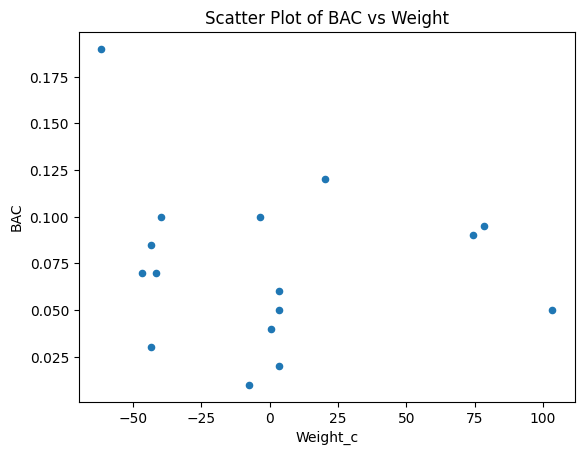

In [25]:
bac_data.plot.scatter( x='Weight_c', y='BAC',title='Scatter Plot of BAC vs Weight')
plt.show()

#### Cook’s distance.
Cook's distance measure the effect that omitting a case has on the estimated regression coeﬀicients. Joint effect of leverage and residual. 
$$D_i = \sum\limits_{j=1}^{n}\frac{\hat{y_{j(i)}}-\hat{y_j}}{p\times se^2}$$
where $\hat{y_j}$ is the $j$-th fitted value in a fit using all points, $\hat{y_{j(i)}}$ is the $j$-th fitted value in a fit that excludes the $i$th point in the dataset, $p$ is the number of regression coefficients, and $se^2$ is our estimated variance from the fit based on all observations (the square of our standard error as seen many times before).

A case that is influential in terms of changing the least squares estimates when deleted will have a high Cook's Distance.

<u style="color: blue; font-size: 1.0em; font-weight: bold;">Rule of thumb</u>: $\approx$ 1 or above indicate large influence.

In [26]:
# Get Cook's distance
sm_fr = influence.summary_frame()
print("Summary Frame with Cook's Distance:\n", sm_fr['cooks_d'])

Summary Frame with Cook's Distance:
 0     0.015976
1     0.004372
2     0.355739
3     0.059289
4     0.013810
5     0.075076
6     0.105788
7     0.068567
8     1.721925
9     0.156125
10    0.000514
11    0.002343
12    0.040019
13    0.000006
14    0.149085
15    0.007064
Name: cooks_d, dtype: float64


#### Leverage vs Cook's Distance

It is hard for an observation with low leverage to have high Cook's Distance.

<img src="images/leverage-vs-cook.png" alt="Leverage and Influence" scale="0.5;" style="width: 70%;">

#### Studentized residuals

A high leverage point is one where the observation is further away from the general trend of predictor values, i.e. a sparse region of the predictor(feature) space. Since the regression model is forced to pass close to the point, its residual is naturally constrained to have smaller variance. In such a case, the residual plot will not direct any attention even if the corresponding observation is influential or problematic, relative to its natural scale.

A high leverage point can have a small residual and yet be highly influential. This is why <b>influence $\neq$ outlier</b> and leverage must be accounted for. On the contrary, large residuals at low-leverage points can look alarming but often don’t matter.

Raw residuals can be misleading. Hence we standardize them while also rescaling them to their natural variability.
- What is a large residual and what is not is unclear without standardization.

<b><u style="color: blue;">Studentized Residual</u></b>: This ensures that our residuals approximately follow a standard normal distribution. 95\% of the residuals must fall between -2 and 2 and those beyond that can be considered unusual.
- Internally studentized residual: $\frac{e_i}{se\sqrt{1-h_i}}$; $h_i$ is the leverage of the corresponding observation
- Internally studentized residual: $\frac{e_i}{se_{(i)}\sqrt{1-h_i}}$; $se_{(i)}$ is the estimated standard deviation of fit <u>after removing</u> the observation in question


In [27]:
studres = influence.get_resid_studentized_external()
studres

array([ 0.52308864, -0.1972758 ,  1.17989119, -0.87579533,  0.52339976,
        0.55503688,  1.34238699, -1.39896462, -2.88021482,  1.13742758,
       -0.0821076 ,  0.21362983, -0.66299171,  0.00962923,  1.12016422,
       -0.4524762 ])

### Thats all folks!
<div style="text-align: center;">
    <img src="images/endslide.png" alt="Linear Regression The End" scale="0.01;" style="width: 40%;">
</div>